# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-ненужных-столбцов" data-toc-modified-id="Удаление-ненужных-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление ненужных столбцов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-выбросов" data-toc-modified-id="Обработка-выбросов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обработка выбросов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-показателей" data-toc-modified-id="Исследование-показателей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исследование показателей</a></span><ul class="toc-item"><li><span><a href="#Показатель-цены" data-toc-modified-id="Показатель-цены-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Показатель цены</a></span></li><li><span><a href="#Показатель-площади" data-toc-modified-id="Показатель-площади-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Показатель площади</a></span></li><li><span><a href="#Показатель-количества-комнат" data-toc-modified-id="Показатель-количества-комнат-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Показатель количества комнат</a></span></li><li><span><a href="#Показатель-высоты-потолков" data-toc-modified-id="Показатель-высоты-потолков-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Показатель высоты потолков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-факторов-влияния-на-цену" data-toc-modified-id="Исследование-факторов-влияния-на-цену-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Исследование факторов влияния на цену</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-топ-10-городов" data-toc-modified-id="Исследование-топ-10-городов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Исследование топ-10 городов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследования-центра-Санкт-Петербурга" data-toc-modified-id="Исследования-центра-Санкт-Петербурга-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Исследования центра Санкт-Петербурга</a></span><ul class="toc-item"><li><span><a href="#Определение-выборки" data-toc-modified-id="Определение-выборки-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Определение выборки</a></span></li><li><span><a href="#Исследование-параметров" data-toc-modified-id="Исследование-параметров-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Исследование параметров</a></span></li><li><span><a href="#Исследование-факторов" data-toc-modified-id="Исследование-факторов-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Исследование факторов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5.4"><span class="toc-item-num">4.5.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('real_estate_data.csv', sep = '\t')
display(df.head(5))
df.info(memory_usage = 'deep')
df.describe().T

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [3]:
print('Данные в locality_name')
print(df['locality_name'].value_counts())

Данные в locality_name
Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64


### Вывод

- В таблице много столбцов, которые не потребуются для исследования, необходима оптимизация
- Требуется изменение типов данных, как минимум для столбца `first_day_exposition`
- Наблюдается много пропусков в разных столбцах, необходимо обработать данные
- Максимальные и минимальные значения во многих столбцах похожи на аномалию. Избавимся от них в процессе исследовательского анализа
- Больше половины квартир в исследуемой выборке находятся непосредственно в Санкт-Петербурге

## Предобработка данных

### Удаление ненужных столбцов

В таблице присутствует 22 столбца. По условиям технического задания нам требуется исследовать взаимосвязи в следующих данных: 
- Площадь `total_area` `living_area` `kitchen_area` также может потребоваться `studio`
- Цена `last_price`
- Число комнат`rooms`
- Высота потолков `ceiling_height`
- Дата размещения объявления `first_day_exposition`
- Время продажи квартиры `days_exposition`
- Удаленность от центра `cityCenters_nearest`
- Этаж `floor` `floors_total`
- Локация `locality_name`

Это 13 столбцов. 9 остальных не трубется анализировать для выполнения условий технического задания, а значит, их можно удалить и не тратить время на их анализ

In [4]:
df = df.drop(columns = [
    'total_images', 
    'is_apartment', 
    'open_plan', 
    'balcony', 
    'airports_nearest', 
    'parks_around3000', 
    'parks_nearest', 
    'ponds_around3000',
    'ponds_nearest'
])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23699 non-null  float64
 1   total_area            23699 non-null  float64
 2   first_day_exposition  23699 non-null  object 
 3   rooms                 23699 non-null  int64  
 4   ceiling_height        14504 non-null  float64
 5   floors_total          23613 non-null  float64
 6   living_area           21796 non-null  float64
 7   floor                 23699 non-null  int64  
 8   studio                23699 non-null  bool   
 9   kitchen_area          21421 non-null  float64
 10  locality_name         23650 non-null  object 
 11  cityCenters_nearest   18180 non-null  float64
 12  days_exposition       20518 non-null  float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 2.2+ MB


### Обработка пропусков

Пропущенные данные присутствуют в следующих столбцах: 
- `ceiling_height` 38% данных
- `floors_total` <1% данных
- `living_area` 8% данных
- `kitchen_area` 10% данных
- `locality_name` <1% данных
- `cityCenters_nearest` 23% данных
- `days_exposition` 13% данных

Для начала избавимся от пропусков, которые не повлияют на качество исследования в виду своей малочисленности

In [5]:
df = df.dropna(subset = ['floors_total', 'locality_name']).reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23565 non-null  float64
 1   total_area            23565 non-null  float64
 2   first_day_exposition  23565 non-null  object 
 3   rooms                 23565 non-null  int64  
 4   ceiling_height        14481 non-null  float64
 5   floors_total          23565 non-null  float64
 6   living_area           21700 non-null  float64
 7   floor                 23565 non-null  int64  
 8   studio                23565 non-null  bool   
 9   kitchen_area          21343 non-null  float64
 10  locality_name         23565 non-null  object 
 11  cityCenters_nearest   18064 non-null  float64
 12  days_exposition       20394 non-null  float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 2.2+ MB


Отсутствие данных в показателе `days_exposition` потенциально может означать, что квартира еще не продана на момент сбора статистики. Изучим срезу данных, обращая особое внимание на столбец `first_day_exposition`

In [6]:
df[df['days_exposition'].isna()].sample(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition
16154,8500000.0,74.0,2018-12-17T00:00:00,2,3.7,5.0,51.00,2,False,9.0,Санкт-Петербург,1826.0,NaN
22911,11500000.0,85.0,2018-08-16T00:00:00,2,3.2,4.0,48.20,4,False,8.2,Санкт-Петербург,1826.0,NaN
18609,9100000.0,68.5,2018-05-05T00:00:00,2,3.3,6.0,30.00,6,False,19.0,Пушкин,31036.0,NaN
1945,3900000.0,42.0,2017-09-01T00:00:00,1,2.8,17.0,16.00,13,False,12.0,Санкт-Петербург,15927.0,NaN
2489,9500000.0,94.9,2019-01-30T00:00:00,3,2.6,17.0,69.30,8,False,10.1,Санкт-Петербург,11344.0,NaN
15052,8150000.0,81.5,2019-02-26T00:00:00,2,3.0,5.0,44.20,1,False,9.5,Санкт-Петербург,3409.0,NaN
17948,1600000.0,49.9,2019-04-20T00:00:00,2,3.1,2.0,32.70,2,False,7.4,Подпорожье,NaN,NaN
20255,9897258.0,85.2,2018-07-23T00:00:00,3,3.0,4.0,48.48,3,False,10.2,Санкт-Петербург,20802.0,NaN
9688,8000000.0,60.0,2018-10-08T00:00:00,2,3.0,6.0,33.00,2,False,9.0,Санкт-Петербург,4816.0,NaN
15837,7200000.0,88.0,2018-12-23T00:00:00,3,2.5,25.0,49.00,23,False,14.0,Санкт-Петербург,15282.0,NaN


Гипотеза не подтвердилась, даты размещения объявлений самый разные. Для анализа этого показателя придется делать срез данных, но удалять все строки с пустыми значениями `days_exposition` не стоит, так как это сильно повлияет на исследование остальных показателей. Оставим пропуски как есть. 

Пропуски по высоте потолков можно заполнить средними значениями, но это сильно исказит статистику, так как пропусков очень большое количество. Лучше оринетироваться на меньшее количество но более достоверных данных при анализе влияния этой величины на цену. Принято решение оставить показатель как есть

Остались столбцы `living_area` и `kitchen_area`. Есть гипотеза, что эти данные должны иметь высокую корреляцию с показателем `total_area`, что позволит заполнить пропуски логичными значениями.

In [7]:
df_la = df[~df['living_area'].isna()]
df_ka = df[~df['kitchen_area'].isna()]

print('Корреляция между показателями living_area и total_area:', df_la['total_area'].corr(df_la['living_area']))
print('Корреляция между показателями kitchen_area и total_area:', df_ka['total_area'].corr(df_la['kitchen_area']))

Корреляция между показателями living_area и total_area: 0.9397711143610333
Корреляция между показателями kitchen_area и total_area: 0.6095076959780383


Первая гипотеза подтвердилась, корреляция между показателем общий площади и жилой площади приближается к единице. Можно найти среднее соотношение жилой площади к общей и использовать этот коэффициент для заполнения пропусков.

In [8]:
df_la_coef = df_la['living_area'] / df_la['total_area']
df['living_area'] = df['living_area'].fillna(df_la_coef.mean() * df['total_area'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23565 non-null  float64
 1   total_area            23565 non-null  float64
 2   first_day_exposition  23565 non-null  object 
 3   rooms                 23565 non-null  int64  
 4   ceiling_height        14481 non-null  float64
 5   floors_total          23565 non-null  float64
 6   living_area           23565 non-null  float64
 7   floor                 23565 non-null  int64  
 8   studio                23565 non-null  bool   
 9   kitchen_area          21343 non-null  float64
 10  locality_name         23565 non-null  object 
 11  cityCenters_nearest   18064 non-null  float64
 12  days_exposition       20394 non-null  float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 2.2+ MB


Так как нет естественного способа заполнить пропуски значений `kitchen_area` и так как данный показатель не столь важен для исследования, оставим данные как есть.

### Замена типа данных

In [9]:
df.info(memory_usage = 'deep')
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23565 non-null  float64
 1   total_area            23565 non-null  float64
 2   first_day_exposition  23565 non-null  object 
 3   rooms                 23565 non-null  int64  
 4   ceiling_height        14481 non-null  float64
 5   floors_total          23565 non-null  float64
 6   living_area           23565 non-null  float64
 7   floor                 23565 non-null  int64  
 8   studio                23565 non-null  bool   
 9   kitchen_area          21343 non-null  float64
 10  locality_name         23565 non-null  object 
 11  cityCenters_nearest   18064 non-null  float64
 12  days_exposition       20394 non-null  float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 6.0 MB


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition
11251,2600000.0,30.0,2018-03-26T00:00:00,1,2.5,9.0,17.000000,5,False,6.0,Колпино,31294.0,52.0
15828,1200000.0,44.5,2018-01-20T00:00:00,2,NaN,5.0,31.500000,3,False,5.4,Каменногорск,NaN,178.0
7009,3900000.0,34.0,2018-02-01T00:00:00,1,NaN,10.0,19.207864,3,False,NaN,Санкт-Петербург,12970.0,43.0
18793,5100000.0,54.0,2017-11-20T00:00:00,2,2.6,18.0,33.000000,15,False,14.0,Санкт-Петербург,22438.0,82.0
19836,4250000.0,49.0,2016-05-26T00:00:00,2,NaN,9.0,30.000000,2,False,7.0,Санкт-Петербург,14724.0,45.0
22998,10450000.0,100.0,2016-10-30T00:00:00,3,NaN,12.0,63.000000,2,False,6.0,Санкт-Петербург,11710.0,444.0
1698,3300000.0,45.3,2017-08-27T00:00:00,2,NaN,9.0,27.900000,2,False,8.3,посёлок Шушары,29936.0,105.0
17714,4449000.0,46.0,2015-12-18T00:00:00,1,2.5,10.0,18.300000,2,False,13.7,Санкт-Петербург,14022.0,182.0
2431,9690000.0,60.6,2017-12-21T00:00:00,2,NaN,23.0,29.000000,22,False,10.4,Санкт-Петербург,16268.0,NaN
18902,3600000.0,34.5,2018-10-29T00:00:00,1,2.6,22.0,16.600000,11,False,9.0,Кудрово,NaN,24.0


Данные потребляет небольшое количество памяти, оптимизация не требуется. Из очевидного, требуется поменять формат столбца `first_day_exposition` в формат datetime оставив только год, день и месяц.

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
df.sample(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition
17292,4750000.0,70.1,2018-09-28,3,NaN,10.0,43.0,2,False,8.8,Сертолово,NaN,158.0
309,12500000.0,86.0,2018-10-19,3,2.8,25.0,47.0,3,False,13.0,Санкт-Петербург,15686.0,NaN
20204,3961140.0,39.3,2017-04-22,1,NaN,25.0,15.8,2,False,13.0,Санкт-Петербург,15945.0,231.0
16867,16500000.0,101.3,2017-12-18,3,2.8,18.0,32.9,10,False,55.7,Санкт-Петербург,8059.0,442.0
19312,5750000.0,60.0,2017-09-04,2,2.6,9.0,32.4,6,False,8.6,Санкт-Петербург,12810.0,301.0


Также, для упрощения визуального восприятия разделим показатель last_price на 1000, таким образом прерватив его в показатель цены в тыс. рублей. 

In [11]:
df['last_price'] = df['last_price'] / 1000
df['last_price'].describe()

count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

### Обработка дубликатов

In [12]:
df[df.duplicated()]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition


Дубликатов не обнаружено

### Вывод

- Удален ряд столбцов, который не потребуется в будущем исследовании, таким образом таблица стала лучше читаема
- В столбцах `floors_total` и `locality_name`удалены пропуски ввиду их малочисленности и невозможности заполнить логичными значениями
- В столбцах `days_exposition`, `kitchen_area` данные оставлены как есть, так как в первом случае слишком большой диапозон данных пришлось бы удалить, а во втором случае показатель не сильно повлияет на исследование
- В столбце `cityCenters_nearest` данные оставлены как есть, так как есть гипотеза, что эти данные означают расположение квартиры непосредственно в центре. Гипотеза будет проверена в исследовании 
- В столбце `living_area` найдена корреляция со столбцом `total_are`. Пропуски заполнены по среднему значению отношения жилой площади к общей
- В столбце `total_price` изменена разрядность на с единиц рублей до тысяч рублей, для упрощения восприятия
- Дубликаты не выявлены

## Расчёты и добавление результатов в таблицу

Выполним задачи по расчету и добавлению  в таблицу: 
- Цену за квадратный метр `price_per_m2`
- День `day`
- Месяц `month`
- Год `year`
- Отношение жилой площади к общей `living_to_total`
- Отношение площади кухни к общей `kitchen_to_total`


In [13]:
df['price_per_m2'] = df['last_price'] / df['total_area']
df['price_per_m2'] = df['price_per_m2'].astype('int')
df['day'] = df['first_day_exposition'].dt.dayofweek
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['living_to_total'] = df['living_area'] / df['total_area']
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']

df.sample(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total
12646,6180.000,61.00,2018-02-15,2,NaN,25.0,34.461168,7,False,NaN,Санкт-Петербург,16344.0,60.0,101,3,2,2018,0.564937,NaN
19917,4400.000,56.70,2018-01-16,3,2.57,9.0,38.800000,9,False,NaN,Санкт-Петербург,10882.0,282.0,77,1,1,2018,0.684303,NaN
18521,5142.565,54.65,2018-10-01,2,NaN,5.0,26.000000,5,False,NaN,Санкт-Петербург,25866.0,145.0,94,0,10,2018,0.475755,NaN
11900,9742.915,93.10,2017-05-23,2,NaN,12.0,48.300000,10,False,25.0,Санкт-Петербург,13845.0,191.0,104,1,5,2017,0.518797,0.268528
6664,4800.000,47.00,2017-03-21,1,3.20,6.0,22.000000,1,False,11.1,Санкт-Петербург,7068.0,NaN,102,1,3,2017,0.468085,0.236170


Выполним задачу по категоризации данных о расположении квартиры на определенном этаже в столбце `floor_type`, применив следующие категории: 
- Первый, если этаж равен единице
- Последний, если этаж равен общему количеству этажей
- Другой в иных случаях
- Нет данных, на случай наличия нулей

In [14]:
df.loc[df['floor'] == 1, 'floor_type'] = 'Первый'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'Последний'
df.loc[df['floor'] == 0, 'floor_type'] = 'Нет данных'
df['floor_type'] = df['floor_type'].fillna('Другой')
df.sample(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type
6030,4900.0,55.0,2017-08-30,1,3.00,20.0,25.0,2,False,20.0,Санкт-Петербург,14640.0,56.0,89,2,8,2017,0.454545,0.363636,Другой
18360,2990.0,28.8,2017-11-07,1,2.50,5.0,16.1,1,False,5.5,Пушкин,29730.0,64.0,103,1,11,2017,0.559028,0.190972,Первый
18365,2900.0,41.0,2018-02-26,1,2.57,10.0,19.0,5,False,11.0,Коммунар,NaN,88.0,70,0,2,2018,0.463415,0.268293,Другой
21245,4600.0,32.1,2019-01-06,1,2.50,14.0,14.1,10,False,7.4,Санкт-Петербург,6185.0,25.0,143,6,1,2019,0.439252,0.230530,Другой
5415,3290.0,70.0,2018-12-20,3,2.50,5.0,46.0,1,False,9.0,Шлиссельбург,NaN,128.0,47,3,12,2018,0.657143,0.128571,Первый
20029,3600.0,36.5,2017-11-12,1,2.55,25.0,17.3,3,False,11.0,деревня Кудрово,NaN,102.0,98,6,11,2017,0.473973,0.301370,Другой
14041,3650.0,44.5,2016-03-29,1,2.75,5.0,18.3,4,False,13.2,Санкт-Петербург,25925.0,87.0,82,1,3,2016,0.411236,0.296629,Другой
20156,2800.0,40.2,2018-09-01,1,NaN,12.0,13.2,6,False,15.2,деревня Куттузи,NaN,93.0,69,5,9,2018,0.328358,0.378109,Другой
2329,2850.0,30.4,2019-01-13,1,NaN,5.0,17.2,5,False,5.4,Гатчина,NaN,52.0,93,6,1,2019,0.565789,0.177632,Последний
17698,5595.4,88.8,2015-03-10,3,2.70,23.0,47.1,12,False,16.8,Санкт-Петербург,17121.0,1099.0,63,1,3,2015,0.530405,0.189189,Другой


### Вывод

Добавлены следующие столбцы: 
- `price_per_m2` - цена за квадратный метр, расчитан как цена разделенная на общую площадь
- `day` - день недели
- `month` - месяц
- `year` - год
- `living_to_total` - доля жилой площади в общей, расчитан как отношение жилой площади к общей
- `kitchen_to_total` - доля площади кухни в общей, расчитан как отношение площади кухни к общей
- `floor_type` - категория этажа, первый, последний, другой

## Исследовательский анализ данных

### Обработка выбросов

Посмотрим на график распределения цены за квартиру по всей выборке

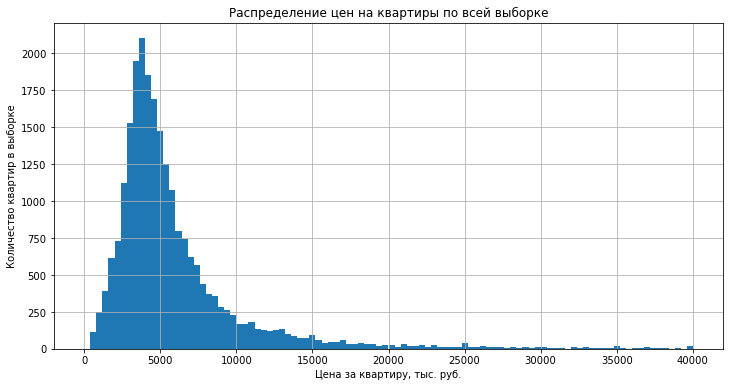

count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

In [15]:
lp_hist = df['last_price'].hist(range = (0, 40000), bins = 100, figsize = (12, 6))
lp_hist.set_title('Распределение цен на квартиры по всей выборке')
lp_hist.set_ylabel('Количество квартир в выборке')
lp_hist.set_xlabel('Цена за квартиру, тыс. руб.')
plt.show()
df['last_price'].describe()

Медианное значение в 4.6 млн сильно отличается от среднего в 6.5 млн. На рынке явно присутствует неравенство, а также возможны ошибки и статистические выборсы. Вызывает подозрение минимальная цена квартиры в 12 190 рублей. Следует внимательнее изучить самые низкие значения по цене

In [16]:
df.query('last_price < 500')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type
5670,450.00,42.0,2017-07-31,2,NaN,1.0,23.000000,1,False,5.8,городской посёлок Будогощь,NaN,233.0,10,0,7,2017,0.547619,0.138095,Последний
6824,490.00,40.0,2017-12-11,1,NaN,5.0,22.597487,3,False,NaN,деревня Старополье,NaN,43.0,12,0,12,2017,0.564937,NaN,Другой
8750,12.19,109.0,2019-03-20,2,2.75,25.0,32.000000,25,False,40.5,Санкт-Петербург,9176.0,8.0,0,2,3,2019,0.293578,0.371560,Последний
9535,450.00,43.4,2018-08-31,2,NaN,5.0,30.300000,3,False,5.5,деревня Старополье,NaN,96.0,10,4,8,2018,0.698157,0.126728,Другой
10722,490.00,29.1,2016-05-05,1,2.50,5.0,17.000000,5,False,5.5,Сланцы,NaN,719.0,16,3,5,2016,0.584192,0.189003,Последний
14825,430.00,54.0,2018-06-26,2,NaN,3.0,30.506607,3,False,NaN,посёлок станции Свирь,NaN,44.0,7,1,6,2018,0.564937,NaN,Последний
15943,480.00,32.0,2019-01-06,1,NaN,2.0,16.000000,1,False,NaN,Сланцы,NaN,83.0,15,6,1,2019,0.500000,NaN,Первый
16130,450.00,38.5,2018-07-11,2,2.65,2.0,21.750081,1,False,NaN,деревня Вахнова Кара,NaN,45.0,11,2,7,2018,0.564937,NaN,Первый
16185,440.00,40.0,2018-07-10,1,NaN,5.0,22.597487,1,False,NaN,деревня Старополье,NaN,45.0,11,1,7,2018,0.564937,NaN,Первый
17359,430.00,30.4,2019-04-22,1,NaN,2.0,16.000000,1,False,6.0,Сланцы,NaN,NaN,14,0,4,2019,0.526316,0.197368,Первый


Небольшие квартиры или частные дома в деревнях вполне могут стоить менее 500 тысяч, но квартира в Санкт-Петербурге площадью 100 квадратных метров точно не может стоить 12 тысяч. Это может быть ошибка и имеется в виду 12 млн, но проще такую строку удалить, тем более, что она всего одна.

In [17]:
df = df.query('last_price > 100')
df.query('last_price < 500')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type
5670,450.0,42.0,2017-07-31,2,NaN,1.0,23.000000,1,False,5.8,городской посёлок Будогощь,NaN,233.0,10,0,7,2017,0.547619,0.138095,Последний
6824,490.0,40.0,2017-12-11,1,NaN,5.0,22.597487,3,False,NaN,деревня Старополье,NaN,43.0,12,0,12,2017,0.564937,NaN,Другой
9535,450.0,43.4,2018-08-31,2,NaN,5.0,30.300000,3,False,5.5,деревня Старополье,NaN,96.0,10,4,8,2018,0.698157,0.126728,Другой
10722,490.0,29.1,2016-05-05,1,2.50,5.0,17.000000,5,False,5.5,Сланцы,NaN,719.0,16,3,5,2016,0.584192,0.189003,Последний
14825,430.0,54.0,2018-06-26,2,NaN,3.0,30.506607,3,False,NaN,посёлок станции Свирь,NaN,44.0,7,1,6,2018,0.564937,NaN,Последний
15943,480.0,32.0,2019-01-06,1,NaN,2.0,16.000000,1,False,NaN,Сланцы,NaN,83.0,15,6,1,2019,0.500000,NaN,Первый
16130,450.0,38.5,2018-07-11,2,2.65,2.0,21.750081,1,False,NaN,деревня Вахнова Кара,NaN,45.0,11,2,7,2018,0.564937,NaN,Первый
16185,440.0,40.0,2018-07-10,1,NaN,5.0,22.597487,1,False,NaN,деревня Старополье,NaN,45.0,11,1,7,2018,0.564937,NaN,Первый
17359,430.0,30.4,2019-04-22,1,NaN,2.0,16.000000,1,False,6.0,Сланцы,NaN,NaN,14,0,4,2019,0.526316,0.197368,Первый
17577,450.0,36.5,2018-02-01,1,NaN,5.0,17.300000,4,False,8.5,деревня Ям-Тесово,NaN,120.0,12,3,2,2018,0.473973,0.232877,Другой


Квартиры в верхнем ценовом диапозоне больше 40 млн рублей сильно выбиваются из общей статистики, лучше всего избавиться от них, так как наша цель провести исследование рыночной цены, а зависимости между ценами и показателями лучше смотреть на стабильных данных. Посмотрим сколько у нас квартир стимостью выше 40 млн. 

In [18]:
df.query('last_price > 40000')['last_price'].describe()

count       181.000000
mean      88078.912442
std       77968.870845
min       40488.000000
25%       50000.000000
50%       65000.000000
75%       90000.000000
max      763000.000000
Name: last_price, dtype: float64

Всего 181 строка, зато данные имеют разброс от 88 до 763 млн и среднее почти в полтора раза выше медианы. Избавимся от них

In [19]:
df = df.query('last_price < 40000')
df['last_price'].describe()

count    23371.000000
mean      5891.668202
std       4552.344004
min        430.000000
25%       3400.000000
50%       4600.000000
75%       6700.000000
max      39990.000000
Name: last_price, dtype: float64

Теперь посмотрим на показатель площади

count    23371.000000
mean        58.849532
std         29.902995
min         12.000000
25%         40.000000
50%         51.900000
75%         69.000000
max        470.300000
Name: total_area, dtype: float64


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

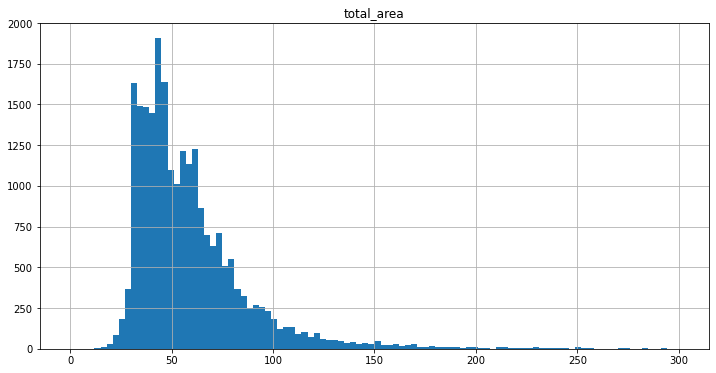

In [20]:
print(df['total_area'].describe())
df.hist('total_area',range = (0, 300), bins = 100, figsize = (12, 6))

Наблюдается два пика в районе 40 и 60 м2. Среднее не так далеко от медианы, данные относительно однородны. Странным кажется показатель более 200 м2. Изучим эти квартиры.

In [21]:
df.query('total_area > 200').sort_values(by = 'total_area')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type
9433,19000.0,201.00,2015-06-24,6,NaN,6.0,136.000000,2,False,20.00,Санкт-Петербург,5698.0,925.0,94,2,6,2015,0.676617,0.099502,Другой
5616,27500.0,201.00,2017-08-04,7,3.20,5.0,130.000000,2,False,17.00,Санкт-Петербург,5647.0,232.0,136,4,8,2017,0.646766,0.084577,Другой
1182,25000.0,201.00,2015-08-07,5,3.50,6.0,131.000000,4,False,35.00,Санкт-Петербург,5458.0,1117.0,124,4,8,2015,0.651741,0.174129,Другой
2453,7900.0,201.50,2018-08-17,7,NaN,2.0,113.834841,2,False,NaN,посёлок Парголово,20665.0,35.0,39,4,8,2018,0.564937,NaN,Последний
2310,17900.0,201.90,2018-02-21,6,3.87,6.0,134.800000,3,False,16.20,Санкт-Петербург,3747.0,126.0,88,2,2,2018,0.667657,0.080238,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,38000.0,400.00,2019-03-15,7,3.60,3.0,225.974870,1,False,NaN,Санкт-Петербург,5457.0,NaN,95,4,3,2019,0.564937,NaN,Первый
22006,27000.0,422.20,2018-10-18,5,2.70,13.0,238.516475,11,False,NaN,Санкт-Петербург,16554.0,NaN,63,3,10,2018,0.564937,NaN,Другой
3660,28789.0,441.98,2019-01-23,4,NaN,6.0,249.690933,6,False,35.05,Санкт-Петербург,5181.0,NaN,65,2,1,2019,0.564937,0.079302,Последний
20160,20000.0,460.80,2019-03-20,6,3.10,3.0,279.600000,1,False,55.50,Санкт-Петербург,15459.0,21.0,43,2,3,2019,0.606771,0.120443,Первый


127 строк явно выбивающихся из общей статистики. Избавимся от них

In [22]:
df = df.query('total_area < 200')
df['total_area'].describe()

count    23241.000000
mean        57.752583
std         25.782672
min         12.000000
25%         40.000000
50%         51.400000
75%         68.200000
max        199.200000
Name: total_area, dtype: float64

Посмотрим количество комнат на предмет аномалий

count    23241.000000
mean         2.028828
std          0.991806
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64


array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

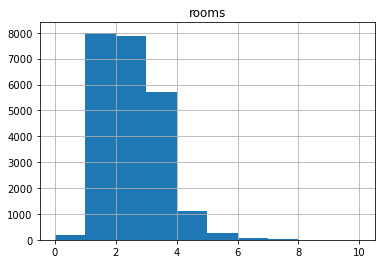

In [23]:
print(df['rooms'].describe())
df.hist('rooms',range = (0, 10), bins = 10)

Чаще всего встречаются двух и трех комнатные квартиры. Начиная с четырехкомнатных заметен сильный спад в предложениях о продаже. Также есть странный показатель в минимальной границе, в квартире не может быть 0 комнат. Изучим данные

In [24]:
df.query('rooms == 0')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type
144,2450.0,27.00,2017-03-30,0,NaN,24.0,15.500000,2,True,NaN,посёлок Мурино,NaN,181.0,90,3,3,2017,0.574074,NaN,Другой
347,2320.0,25.00,2017-09-27,0,NaN,14.0,17.000000,1,False,NaN,деревня Кудрово,NaN,45.0,92,2,9,2017,0.680000,NaN,Первый
438,2480.0,27.11,2018-03-12,0,NaN,17.0,24.750000,4,True,NaN,Санкт-Петербург,15015.0,64.0,91,0,3,2018,0.912947,NaN,Другой
505,3375.0,34.40,2017-03-28,0,NaN,26.0,24.300000,19,False,NaN,посёлок Парголово,19292.0,430.0,98,1,3,2017,0.706395,NaN,Другой
605,1850.0,25.00,2019-02-20,0,NaN,10.0,14.123429,7,True,NaN,посёлок Шушары,NaN,29.0,74,2,2,2019,0.564937,NaN,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23079,3200.0,26.00,2017-09-01,0,NaN,25.0,18.000000,16,True,NaN,Санкт-Петербург,13222.0,14.0,123,4,9,2017,0.692308,NaN,Другой
23310,2500.0,27.70,2017-09-28,0,NaN,24.0,18.000000,4,False,NaN,посёлок Мурино,NaN,4.0,90,3,9,2017,0.649819,NaN,Другой
23422,3350.0,26.00,2018-09-07,0,NaN,19.0,14.688367,8,True,NaN,Санкт-Петербург,17092.0,31.0,128,4,9,2018,0.564937,NaN,Другой
23459,1450.0,29.00,2017-11-11,0,NaN,9.0,18.000000,8,False,NaN,Никольское,NaN,82.0,50,5,11,2017,0.620690,NaN,Другой


Ноль комнат в тех строках, где показатель `studio` равен `True` еще может быть объясним, скорее всего имеется в виду одна единственная комната совмещенная с кухней. Однако остальные нули объяснить сложно. Избавимся от них.

In [25]:
df = df.query('~(rooms == 0 and studio == True)')
df.loc[df['rooms'] == 0] = 1
df = df.drop(columns = 'studio')
df['rooms'].describe()

count    23106.000000
mean         2.043192
std          0.978516
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

Теперь посмотрим на статистические показатели количества комнат во всей выборке.

In [26]:
df['rooms'].value_counts()

1     8060
2     7885
3     5718
4     1106
5      254
6       59
7       20
11       2
8        2
Name: rooms, dtype: int64

Похоже все, что больше 7 комнат это уже единичные случаи. Избавимся от них, как от выбросов.

In [27]:
df = df.query('rooms < 8')
df['rooms'].describe()

count    23102.000000
mean         2.041901
std          0.973468
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Теперь изучим показатель высоты потолков

count    14245.000000
mean         2.753224
std          1.257016
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

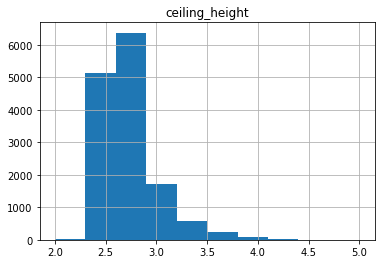

In [28]:
print(df['ceiling_height'].describe())
df.hist('ceiling_height', range = (2, 5), bins = 10)

Сразу бросается в глаза странный показатель потолка в размере 100 метров. Вряд ли существует 5 или 4 этажная квартира, это скорее продажа дома, а не квартиры. Изучим данные с квартирами, чьи потолки выше 10 метров.

In [29]:
df.query('ceiling_height > 10')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type
353,3600.0,55.2,2018-07-12 00:00:00,2,25.0,5.0,32.0,2,NaN,Гатчина,NaN,259.0,65,3,7,2018,0.579710,NaN,Другой
3134,2900.0,75.0,2018-11-12 00:00:00,3,32.0,3.0,53.0,2,8.0,Волхов,NaN,NaN,38,0,11,2018,0.706667,0.106667,Другой
4621,4300.0,45.0,2018-02-01 00:00:00,2,25.0,9.0,30.0,2,7.0,Санкт-Петербург,13256.0,181.0,95,3,2,2018,0.666667,0.155556,Другой
5051,3850.0,30.5,2018-10-03 00:00:00,1,24.0,5.0,19.5,1,5.5,Санкт-Петербург,8389.0,7.0,126,2,10,2018,0.639344,0.180328,Первый
5219,2500.0,54.0,2017-10-13 00:00:00,2,27.0,5.0,30.0,3,9.0,деревня Мины,NaN,540.0,46,4,10,2017,0.555556,0.166667,Другой
5641,4400.0,50.0,2017-08-08 00:00:00,2,26.0,9.0,21.3,3,7.0,Санкт-Петербург,10912.0,267.0,88,1,8,2017,0.426000,0.140000,Другой
5777,8150.0,80.0,2019-01-09 00:00:00,2,27.0,36.0,41.0,13,12.0,Санкт-Петербург,20444.0,38.0,101,2,1,2019,0.512500,0.150000,Другой
6213,3300.0,44.4,2019-03-25 00:00:00,2,25.0,5.0,31.3,5,5.7,Кронштадт,50649.0,NaN,74,0,3,2019,0.704955,0.128378,Последний
9334,3950.0,42.0,2017-03-26 00:00:00,3,25.0,5.0,30.0,2,5.2,Санкт-Петербург,13581.0,NaN,94,6,3,2017,0.714286,0.123810,Другой
10713,3800.0,58.0,2017-10-13 00:00:00,2,27.0,10.0,30.1,3,8.1,посёлок Мурино,NaN,71.0,65,4,10,2017,0.518966,0.139655,Другой


Очевидна ошибка в данных. Ряд квартир продаются в небольших городах и поселках, при этом имеют значения от 22 до 32 метров. Скорее всего имелось в виду не 22 и 32, а 2.2 и 3.2 метра. Исправим эту ошибку, аномальную квартиру в 100 метров удалим. 

In [30]:
df = df.drop(df[df['ceiling_height'] == 100].index)
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df['ceiling_height'] / 10
df['ceiling_height'].describe()

count    14244.000000
mean         2.710230
std          0.297501
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

Теперь посмотрим на квартиры с высотой потолков менее 2 метров 

In [31]:
df.query('ceiling_height < 2')['ceiling_height'].describe()

count    63.000000
mean      1.021905
std       0.108744
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.750000
Name: ceiling_height, dtype: float64

Такие данные сложно объяснить логически, при этом таких показателей не может быть в принципе. Избавимся от них.

In [32]:
df = df.drop(df.query('ceiling_height < 2').index)
df['ceiling_height'].describe()

count    14181.000000
mean         2.717731
std          0.275913
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

Теперь данные в полном порядке. Средняя высота потолков составляет 2.7 метра, разброс значения от 2 метров до 8.3 метров, что скорее всего является двух или трех этажной квартирой. 

Исследуем показатель времени жизни объявления

count    19958.000000
mean       179.684287
std        218.290098
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

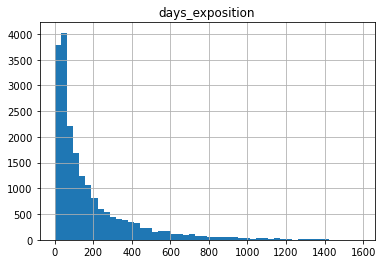

In [33]:
df.hist('days_exposition', bins = 50)
df['days_exposition'].describe()

Среднее почти в два раза выше медианы. Данные крайне неоднородны, то же самое видно по графику. Судя по данныи квантилей, чаще всего квартиры продаются от 45 до 240 дней, то есть от 1.5 до 8 месяцев. Изучим данные по локациям, на предмет населенных пунктов с аномальными показателями.

In [35]:
df_locations = df[['locality_name', 'days_exposition']].copy()
df_locations['too_fast'] = df_locations['days_exposition'] < 45
df_locations['too_slow'] = df_locations['days_exposition'] > 240

too_fast = pd.pivot_table(df_locations, index='locality_name', values='too_fast')
bad_names_fast = too_fast.query('too_fast > 0.5')
bad_names_fast

too_slow = pd.pivot_table(df_locations, index='locality_name', values='too_slow')
bad_names_slow = too_slow.query('too_slow > 0.5')

bad_names = list(bad_names_slow.index) + list(bad_names_fast.index)

df.query('locality_name in @bad_names')['days_exposition'].describe()

count     112.000000
mean      259.160714
std       256.416804
min         3.000000
25%        18.750000
50%       247.000000
75%       414.500000
max      1069.000000
Name: days_exposition, dtype: float64

Всего 112 строк с редкими локациями, которые на более чем 50% состоят из выбросов. Избавимся от них.

In [37]:
df = df.query('locality_name not in @bad_names')
df.query('locality_name in @bad_names')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type


#### Вывод

Для избавления от выбросов были осуществлены следующие действия:
- Определен ценовой диапозон от 430 тысяч до 40 млн рублей за квратиру
- Площадь от 12 до 200 м2
- Количество комнат от 1 до 7 
- Высота потолков от 2 до 8.3 метров
- Удалено 112 строк с явными аномалиями по времени продажи квратиры

### Исследование показателей

#### Показатель цены

count    22921.000000
mean      5825.937451
std       4310.016481
min        430.000000
25%       3450.000000
50%       4610.000000
75%       6700.000000
max      39990.000000
Name: last_price, dtype: float64

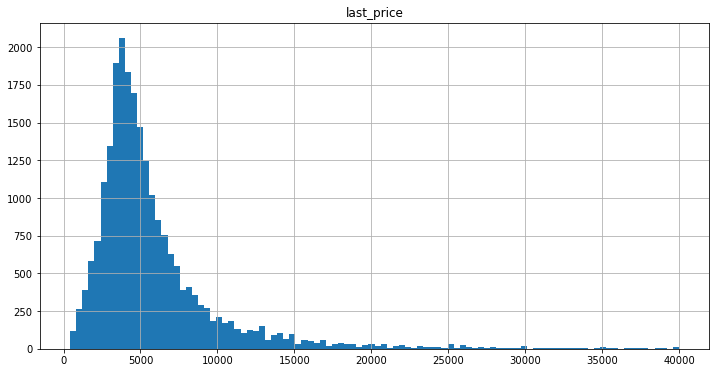

In [38]:
df.hist('last_price', bins = 100, figsize = (12, 6))
df['last_price'].describe()

#### Показатель площади

count    22921.000000
mean        58.029096
std         25.724773
min         12.000000
25%         40.000000
50%         52.000000
75%         68.700000
max        199.200000
Name: total_area, dtype: float64

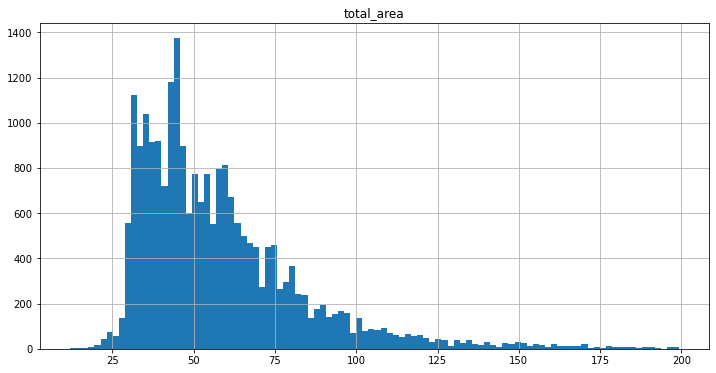

In [39]:
df.hist('total_area', bins = 100, figsize = (12, 6))
df['total_area'].describe()

#### Показатель количества комнат

count    22921.000000
mean         2.045417
std          0.974181
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

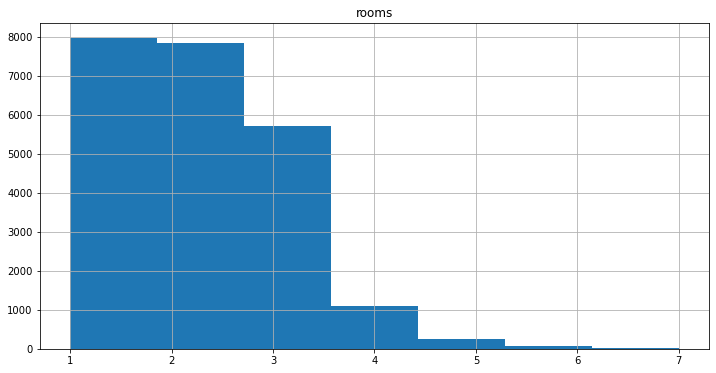

In [40]:
df.hist('rooms', bins = 7, figsize = (12, 6))
df['rooms'].describe()

#### Показатель высоты потолков

count    14119.000000
mean         2.718239
std          0.276210
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

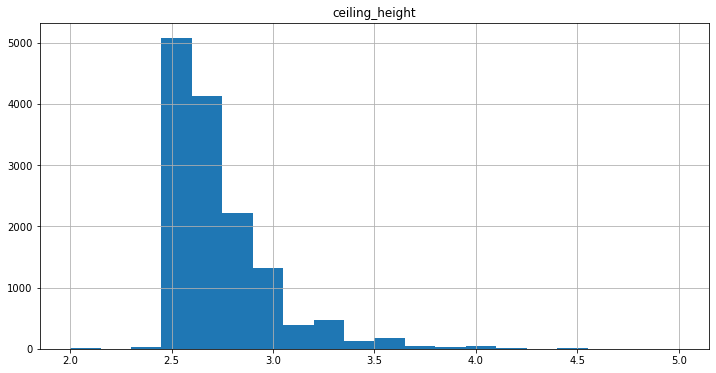

In [41]:
df.hist('ceiling_height', range = (2, 5), bins = 20, figsize = (12, 6))
df['ceiling_height'].describe()

#### Вывод

По общей выборке определены следующие параметры:

**Цена**

- Большая часть квартир продается в диапозоне от 3.5 до 6.7 млн рублей
- Средняя цена по выборке - 4.6 млн
- Медианная цена по выборке - 5.8 млн

**Общая площадь**

- Большая часть квартир имеет площадь до 40 до 70 м2
- Средняя площадь - 52 м2
- Медианная площадь - 58 м2

**Количество комнат**

- Абсолютное большинство квартир имеет от 1 до 3 комнат

**Высота потолков**

- Абсолютное большинство квартир имеет высоту потолков от 2.5 до 2.8 метров

### Исследование факторов влияния на цену

Техническим задание требуется определить влияние факторов общей площади, количества комнат, удаленности от центра, типа этажа, дня, месяца и года размещения объявления на цену. Построим диаграмы рассеивания для показателей площади и удаленности от центра.

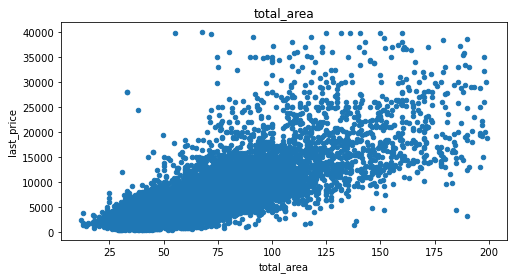

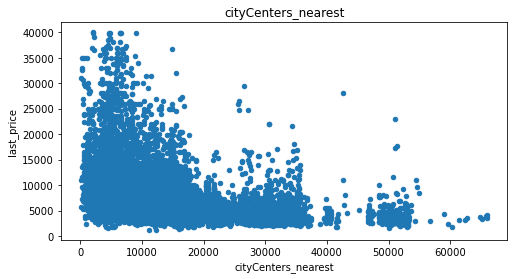

In [42]:
for_scatter = ['total_area','cityCenters_nearest']

for name in for_scatter:
    df.plot(x = name, y = 'last_price', kind = 'scatter', title = name, figsize = (8, 4))

До 75м2 наблюдается четкая зависимость цены. Далее разброс становится больше, но общий тренд очевиден по графику - чем больше прощадь, тем больше цена.

Видна зависимость цены от расстояния до центра в диапозоне от 0 до 20 км. Далее есть два пика в районе 30 км и 50 км. Скорее всего расстояние до центра измеряется от центра Санкт-Петербурга, а не центра каждого из городов и поселений округи. Пока можно однозначно утверждать, что квартиры от 0 до 10 км до центра значительно дороже прочих.

Теперь построим столбчатые диаграмы для показателей года, месяца, дня недели, количества комнат и этажа по средней цене квартиры.

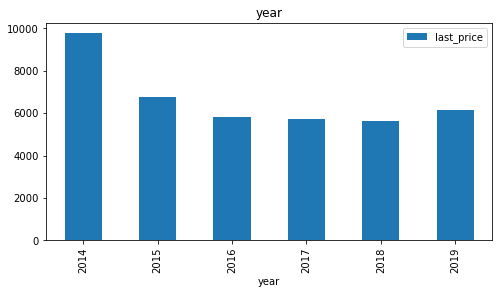

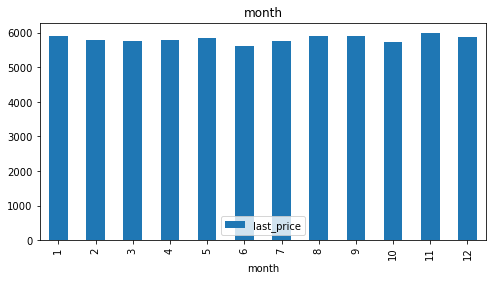

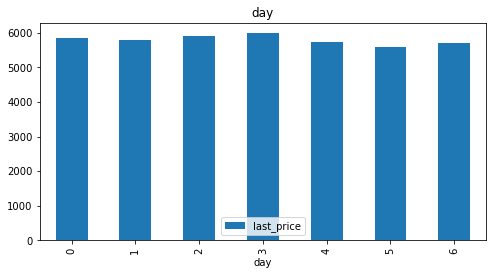

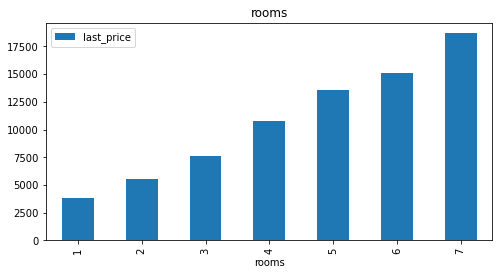

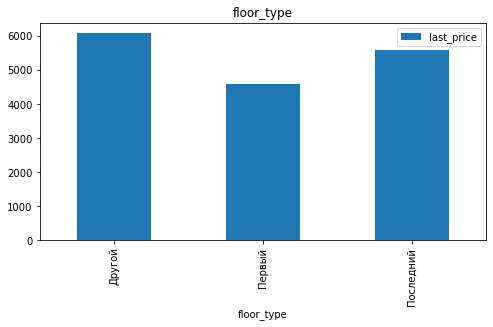

In [43]:
for_bar = ['year','month', 'day', 'rooms', 'floor_type']

for name in for_bar:
    df.pivot_table(index = name, values = 'last_price', aggfunc = 'mean').plot(kind = 'bar', title = name, figsize = (8, 4))

С 2014-ого года, когда наблюдалась самая большая средняя цена за квартру до 2016 наблюдалось падение, после чего цена стабилизировалась и показала небольшой рост в 2019-ом относительно 2018-ого. Зависимость от дня недели и месяца практически нулевая. Чуть дешевле продаются квартиры, выставленные в июне и октябре, а также те, что были выставлены в пятницу, субботу и воскресенье. 

Показатель этажа дает нам четкую картину - дороже всего в среднем стоят квартиры расположенные не на первом и не на последнем этаже, чуть дешевле квартиры расположенные на последнем этаже и значительно дешевле те, что расположены на первом этаже.

#### Вывод

- Абсолютное большинство квартир имеет прямую зависимость цены от общей площади. Зависимость становится мене очевидной после 75 м2
- Квартиры до 10 км от центра сильно дороже прочих. Скорее всего квартиры с точки зрения цены деляться на те, что в центре и прочие. Это будет проверено в исследовании центра далее
- Квартиры выставленные в 2014-ом году значительно дороже тех, что выставлялись позже. Далее нет ярко выраженной зависимости цены от года
- Обнаружена прямая зависимость цены от количества комнат
- Квартиры расположенные на первом этаже несколько дешевле квартир, расположенных на других этажах
- Зависимость цены от месяца и дня недели размещения объявления не обнаружена

### Исследование топ-10 городов

Техническим заданием требуется составить рейтинг из 10 городов с наибольшим числом объявлений о продаже квартир и проанализировать стоимость квадратного метра в них. Составим сводную таблицу для анализа

In [44]:
df_top10 = df.pivot_table(index = 'locality_name', values = 'price_per_m2', aggfunc = ['count', 'mean'])
df_top10.columns = ['offers', 'mean_price_m2']
df_top10 = df_top10.sort_values(by = 'offers', ascending = False).head(10)
df_top10

,offers,mean_price_m2
locality_name,,
Санкт-Петербург,15225,111.077110
посёлок Мурино,494,84.566802
посёлок Шушары,435,77.777011
Всеволожск,392,68.142857
Пушкин,364,102.651099
Колпино,337,74.860534
посёлок Парголово,322,90.006211
Гатчина,307,68.263844
деревня Кудрово,283,91.802120


Отсортируем данные по стоимости квадратного метра.

In [45]:
df_top10 = df_top10.sort_values(by = 'mean_price_m2', ascending = False)
df_top10

,offers,mean_price_m2
locality_name,,
Санкт-Петербург,15225,111.077110
Пушкин,364,102.651099
деревня Кудрово,283,91.802120
посёлок Парголово,322,90.006211
посёлок Мурино,494,84.566802
посёлок Шушары,435,77.777011
Колпино,337,74.860534
Гатчина,307,68.263844
Всеволожск,392,68.142857


Добавим метрику, показывающую на сколько каждый следующий за лидером по цене город отличатеся от первого.

In [46]:
df_top10['ratio%'] = (1 - (df_top10['mean_price_m2'] / df_top10['mean_price_m2'][0]))*100
df_top10

,offers,mean_price_m2,ratio%
locality_name,,,
Санкт-Петербург,15225,111.077110,0.000000
Пушкин,364,102.651099,7.585731
деревня Кудрово,283,91.802120,17.352801
посёлок Парголово,322,90.006211,18.969614
посёлок Мурино,494,84.566802,23.866581
посёлок Шушары,435,77.777011,29.979263
Колпино,337,74.860534,32.604896
Гатчина,307,68.263844,38.543734
Всеволожск,392,68.142857,38.652656


Самым дорогим городом ожидаемо оказался Санкт-Петербург. Середина рейтинга дешевле лидера примерно на 25%, самый дешевый город в рейтинге - Выборг, там квартиры практически в два раза дешевле, чем в Санкт-Петербурге.

#### Вывод

- Больше всего квартир обнаружено в Санкт-Петербурге, цена за квадратный метр самая дорогая по всей выборке - 110 тысяч за м2
- Меньше всего квартир из рейтинга топ-10 городов обнаружено в Выборге, цена за квадратный метр там также самая дешевая - 58 тысяч за квадратный метр. Это почти в два раза дешевле Санкт-Петербурга

### Исследования центра Санкт-Петербурга

#### Определение выборки

Что бы проанализировать центр Санкт-Петебруга, необходимо определить где центр находится. Также напомню, что при обработке пропусков было озвучено предположение, что пустые значения в столбце `cityCenters_nearest` вероятно показывают квратиры в центре. Создадим таблицу для дальнейшего анализа.`

In [47]:
df_spb = df.query('locality_name == "Санкт-Петербург"').copy()
df_spb['city_center_km'] = df_spb['cityCenters_nearest'] / 1000
df_spb['city_center_km'] = df_spb['city_center_km'].fillna(0).astype('int')
df_spb.head(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type,city_center_km
0,13000.0,108.0,2019-03-07 00:00:00,3,2.70,16.0,51.000000,8,25.0,Санкт-Петербург,16028.0,NaN,120,3,3,2019,0.472222,0.231481,Другой,16
2,5196.0,56.0,2015-08-20 00:00:00,2,NaN,5.0,34.300000,4,8.3,Санкт-Петербург,13933.0,558.0,92,3,8,2015,0.612500,0.148214,Другой,13
4,10000.0,100.0,2018-06-19 00:00:00,2,3.03,14.0,32.000000,13,41.0,Санкт-Петербург,8098.0,121.0,100,1,6,2018,0.320000,0.410000,Другой,8
7,7915.0,71.6,2019-04-18 00:00:00,2,NaN,24.0,40.449502,22,18.9,Санкт-Петербург,11634.0,NaN,110,3,4,2019,0.564937,0.263966,Другой,11
9,5400.0,61.0,2017-02-26 00:00:00,3,2.50,9.0,43.600000,7,6.5,Санкт-Петербург,15008.0,289.0,88,6,2,2017,0.714754,0.106557,Другой,15


In [48]:
df_spb_km_price = df_spb.pivot_table(index = 'city_center_km', values = 'last_price', aggfunc = 'mean')
df_spb_km_price.head(5)

,last_price
city_center_km,
0,12613.126331
1,11529.780369
2,10638.360727
3,10162.895942
4,11326.622346


Квартиры с пустым значением `cityCenter_nearest` все еще самые дороги и не выпадают из общей статистики. Похоже гипотеза была верна, оставим данные как есть. Теперь построим график и изменением цены в зависимости от изменения километража.

<AxesSubplot:title={'center':'Средняя цена километра от центра'}, xlabel='city_center_km'>

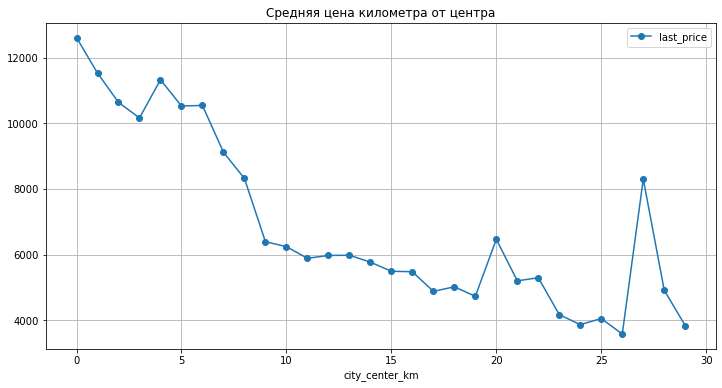

In [49]:
df_spb_km_price.plot(figsize = (12, 6), grid = True, style = 'o-', title = 'Средняя цена километра от центра')

Интересный всплекс цены в районе 27-ого километра, но сейчас он нас не интересует. Кажется мы можем четко определить квартиры в центре, это квартиры с показателем от 0 до 6 км включительно. Создадим выборку с квартрами в центре Санкт-Петерубрга и исследуем ее.

In [50]:
df_spb_center = df_spb.query('city_center_km <= 6').copy()
df_spb_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 24 to 23560
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            3089 non-null   float64
 1   total_area            3089 non-null   float64
 2   first_day_exposition  3089 non-null   object 
 3   rooms                 3089 non-null   int64  
 4   ceiling_height        2011 non-null   float64
 5   floors_total          3089 non-null   float64
 6   living_area           3089 non-null   float64
 7   floor                 3089 non-null   int64  
 8   kitchen_area          2807 non-null   float64
 9   locality_name         3089 non-null   object 
 10  cityCenters_nearest   3034 non-null   float64
 11  days_exposition       2559 non-null   float64
 12  price_per_m2          3089 non-null   int32  
 13  day                   3089 non-null   int64  
 14  month                 3089 non-null   int64  
 15  year               

#### Исследование параметров

Начнем с исследования параметров площади, цены, числа комнат и высота потолков. Повторим те же приемы, которые мы использовали при анализе этих параметров для всей выборки.

count     3089.000000
mean     10855.813906
std       6607.980136
min       1600.000000
25%       6550.000000
50%       8850.000000
75%      12900.000000
max      39990.000000
Name: last_price, dtype: float64

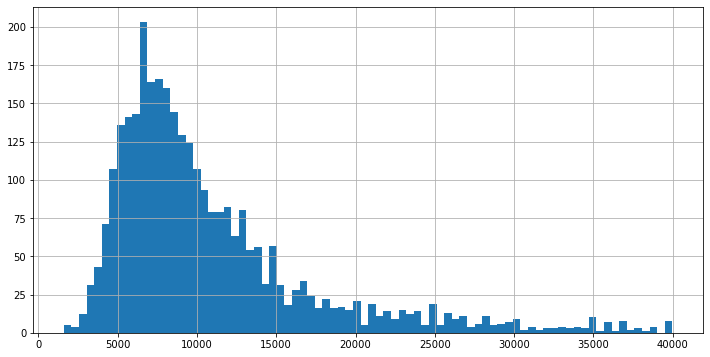

In [51]:
df_spb_center['last_price'].hist(bins = 80, figsize = (12, 6))
df_spb_center['last_price'].describe()

Картинка похожа на ту,которую мы получали при изучении цены по всей выборке, только цены выше. Средняя цена по центру составляет 8.8 млн против 4.6 млн по всей выборке. Медианное значение разнится на ту же величину, 10.8 млн в центре против 5.8 млн по всей выборке. Можно однозначно сделать вывод, что квартиры в центре дороже практически в два раза относительно квартир в общей выборке. 

count    3089.000000
mean       82.224535
std        35.291760
min        12.000000
25%        56.000000
50%        75.500000
75%       101.900000
max       198.000000
Name: total_area, dtype: float64

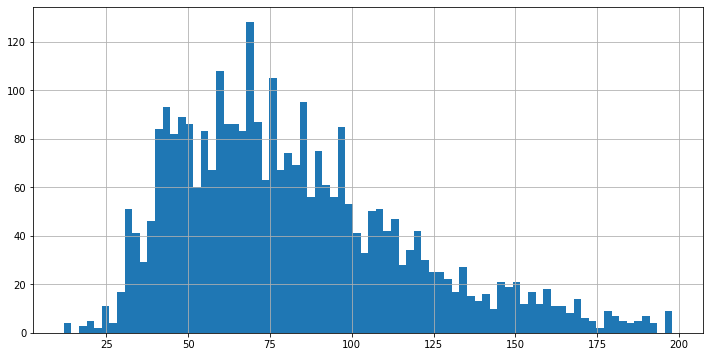

In [52]:
df_spb_center['total_area'].hist(bins = 80, figsize = (12, 6))
df_spb_center['total_area'].describe()

Расстояние между среднем и медианой примерно равно расстоянию по всей выборке, а вот параметры подросли. 75 м2 медианы проти в 51 м2 по всей выборке и 82 м2 среднего против 57 м2 по всей выборке. Квартиры в центре также практически в два раза больше по размеру квартир по всей выборке. 

count    3089.000000
mean        2.678860
std         1.197665
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64

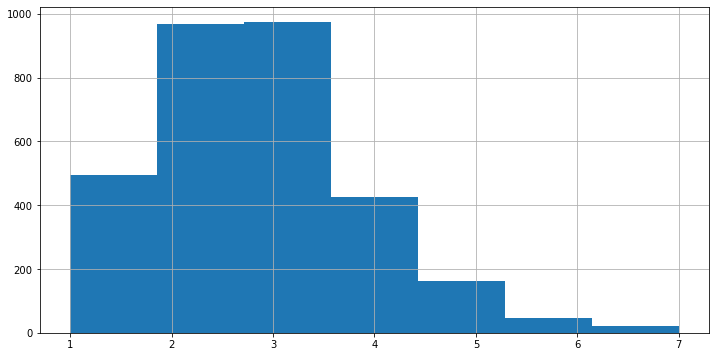

In [53]:
df_spb_center['rooms'].hist(bins = 7, figsize = (12, 6))
df_spb_center['rooms'].describe()

Если по всей выборке в среднем чаще встречаются квартиры с двумя комната, то для центра чаще можно встретить трехкомнатные квартиры. На целую комнату больше! Не удивительно, что они дороже.

count    2011.000000
mean        3.079622
std         0.345871
min         2.400000
25%         2.820000
50%         3.000000
75%         3.250000
max         5.500000
Name: ceiling_height, dtype: float64

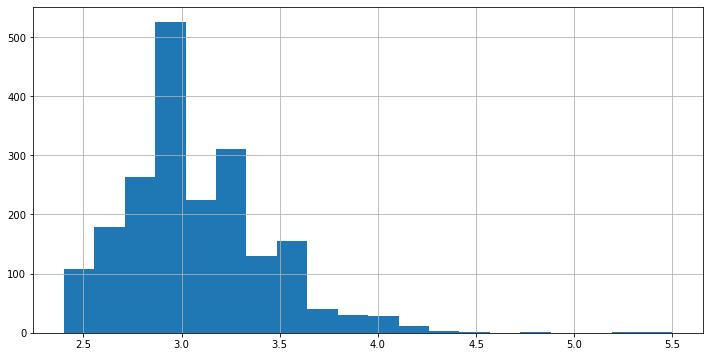

In [54]:
df_spb_center['ceiling_height'].hist(bins = 20, figsize = (12, 6))
df_spb_center['ceiling_height'].describe()

Потолки в центре тоже оказались выше, 3 метра в среднем проти в 2.7 метров по всей выборке.

#### Исследование факторов

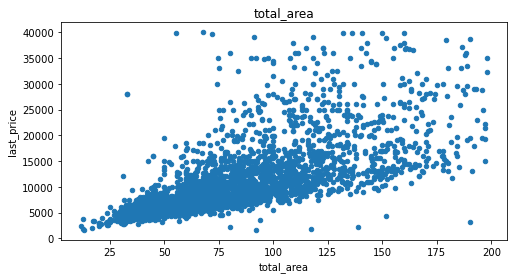

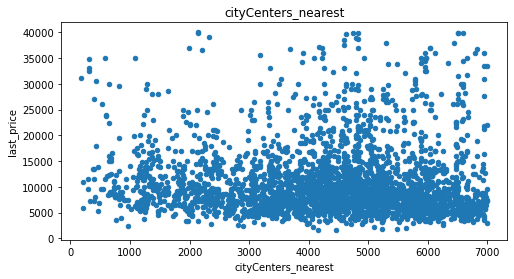

In [55]:
for_scatter = ['total_area','cityCenters_nearest']

for name in for_scatter:
    df_spb_center.plot(x = name, y = 'last_price', kind = 'scatter', title = name, figsize = (8, 4))

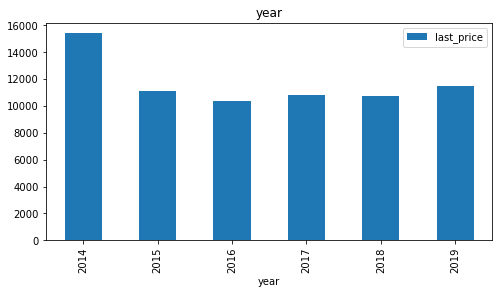

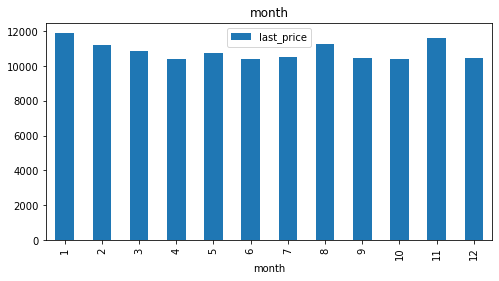

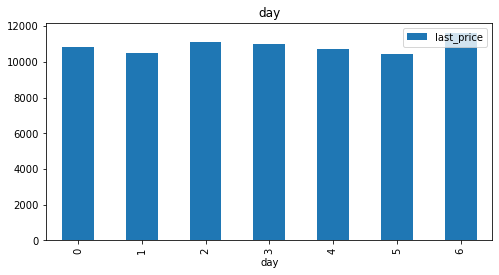

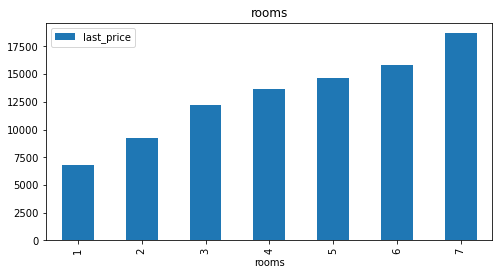

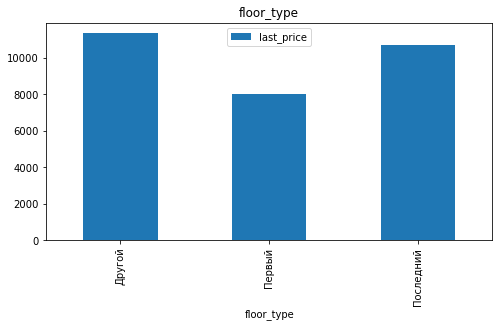

In [56]:
for_bar = ['year','month', 'day', 'rooms', 'floor_type']

for name in for_bar:
    df_spb_center.pivot_table(index = name, values = 'last_price', aggfunc = 'mean').plot(kind = 'bar', title = name, figsize = (8, 4))

#### Вывод

Центр Санкт-Петербурга находится по показателю удаленности от центра от 0 до 6 км

**Параметры**

- Средняя цена квартиры в центре Санкт-Петебурга практически в два раза больше, чем средняя цена по всей выборке - 8.8 млн против 4.6 млн 
- Средняя площадь также выше практически в два раза, 82 м2 в центре против 52 м2 по всей выборке
- Большая часть квартир содержит 3 комнаты, против диапозона от 1 до 3 комнат по всей выборке
- Потолки выше в центре - в среднем 3 метра против 2.7 по всей выборке

**Тренды**

Тренды, которые не меняются в зависимсоти от выборки:
- Чем болше площадь, тем больше цена. Зависимость слабеет после 75 м2
- Чем больше комнат, тем больше цена
- Квартире на первом этаже дешевле прочих. Квартиры на последнем этаже чуть дешевле квартир не на первом и не на последнем этажах
- После 2014-ого года наблюдается падение средней цены за квартиру 
- Нет ярко выраженной зависимости от дня недели и месяца размещения объявления


## Общий вывод

По общей выборке определены следующие параметры:

**Цена**

- Большая часть квартир продается в диапозоне от 3.5 до 6.7 млн рублей
- Средняя цена по выборке - 4.6 млн
- Медианная цена по выборке - 5.8 млн

**Общая площадь**

- Большая часть квартир имеет площадь до 40 до 70 м2
- Средняя площадь - 52 м2
- Медианная площадь - 58 м2

**Количество комнат**

- Абсолютное большинство квартир имеет от 1 до 3 комнат

**Высота потолков**

- Абсолютное большинство квартир имеет высоту потолков от 2.5 до 2.8 метров

**Влияние на цену**

- Абсолютное большинство квартир имеет прямую зависимость цены от общей площади. Зависимость становится мене очевидной после 75 м2
- Квартиры до 10 км от центра сильно дороже прочих. Скорее всего квартиры с точки зрения цены деляться на те, что в центре и прочие. Это будет проверено в исследовании центра далее
- Квартиры выставленные в 2014-ом году значительно дороже тех, что выставлялись позже. Далее нет ярко выраженной зависимости цены от года
- Обнаружена прямая зависимость цены от количества комнат
- Квартиры расположенные на первом этаже несколько дешевле квартир, расположенных на других этажах
- Зависимость цены от месяца и дня недели размещения объявления не обнаружена

**Исследование топ-10 городов**

- Больше всего квартир обнаружено в Санкт-Петербурге, цена за квадратный метр самая дорогая по всей выборке - 110 тысяч за м2
- Меньше всего квартир из рейтинга топ-10 городов обнаружено в Выборге, цена за квадратный метр там также самая дешевая - 58 тысяч за квадратный метр. Это почти в два раза дешевле Санкт-Петербурга

**Отличия центра Санкт-Петербурга** 
- Средняя цена квартиры в центре Санкт-Петебурга практически в два раза больше, чем средняя цена по всей выборке - 8.8 млн против 4.6 млн 
- Средняя площадь также выше практически в два раза, 82 м2 в центре против 52 м2 по всей выборке
- Большая часть квартир содержит 3 комнаты, против диапозона от 1 до 3 комнат по всей выборке
- Потолки выше в центре - в среднем 3 метра против 2.7 по всей выборке
